In [111]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [112]:
dir = "p_date=2023-01-12-15_48_12"

In [113]:
path = f'../../output/weights/{dir}/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

102001 records
dict_keys(['loss', 'mae', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [114]:
slice = 100_000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [115]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 1_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

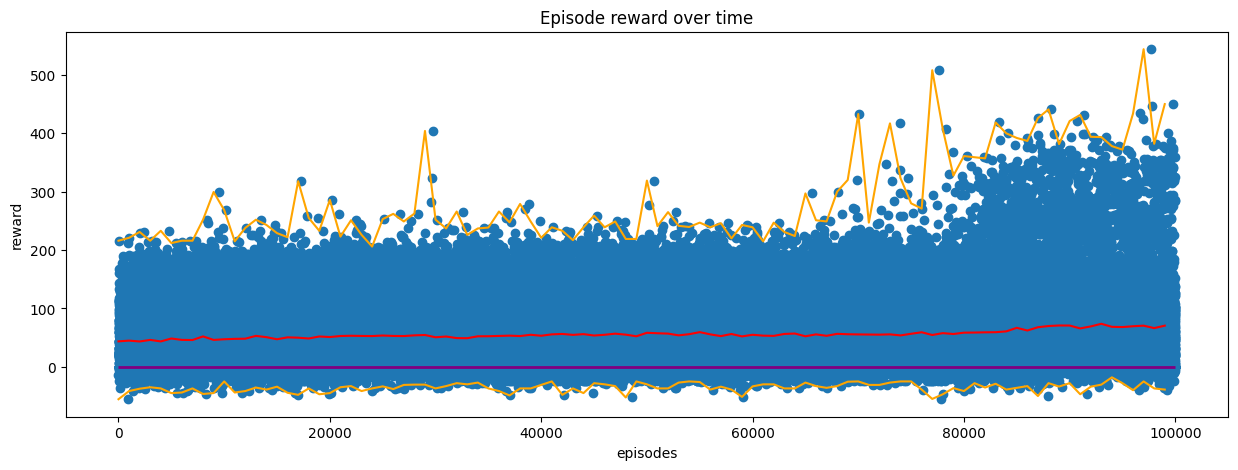

Maximum: 544.0
Average: 55.46103700000046

Values: 43.6 > 44.9 > 43.4 > 46.1 > 43.5 > 48.5 > 46.1 > 45.9 > 52.1 > 46.1 > 47.2 > 47.9 > 48.2 > 53.0 > 50.8 > 47.2 > 50.5 > 49.9 > 48.5 > 52.0 > 51.0 > 52.8 > 53.2 > 52.9 > 52.7 > 53.6 > 52.9 > 52.7 > 53.9 > 54.5 > 50.6 > 51.9 > 49.2 > 49.0 > 52.3 > 52.4 > 52.9 > 53.4 > 52.7 > 54.9 > 53.2 > 55.6 > 56.3 > 54.7 > 56.0 > 53.6 > 54.9 > 56.8 > 55.1 > 52.3 > 58.3 > 57.5 > 56.9 > 53.9 > 55.9 > 59.4 > 55.6 > 52.6 > 56.2 > 52.1 > 54.9 > 53.4 > 53.0 > 56.3 > 57.0 > 52.3 > 55.6 > 53.1 > 56.5 > 55.8 > 55.5 > 55.3 > 55.1 > 55.6 > 53.8 > 56.6 > 59.2 > 54.5 > 57.7 > 56.2 > 58.5 > 58.7 > 59.1 > 59.3 > 60.7 > 66.8 > 62.2 > 67.8 > 69.9 > 70.8 > 70.7 > 65.8 > 69.2 > 73.7 > 68.5 > 68.1 > 69.5 > 70.5 > 66.3 > 70.5

Minimum (last 1000): -55.5
Average (last 1000): 55.30899191919191
Maximum (last 1000): 544.0


In [116]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

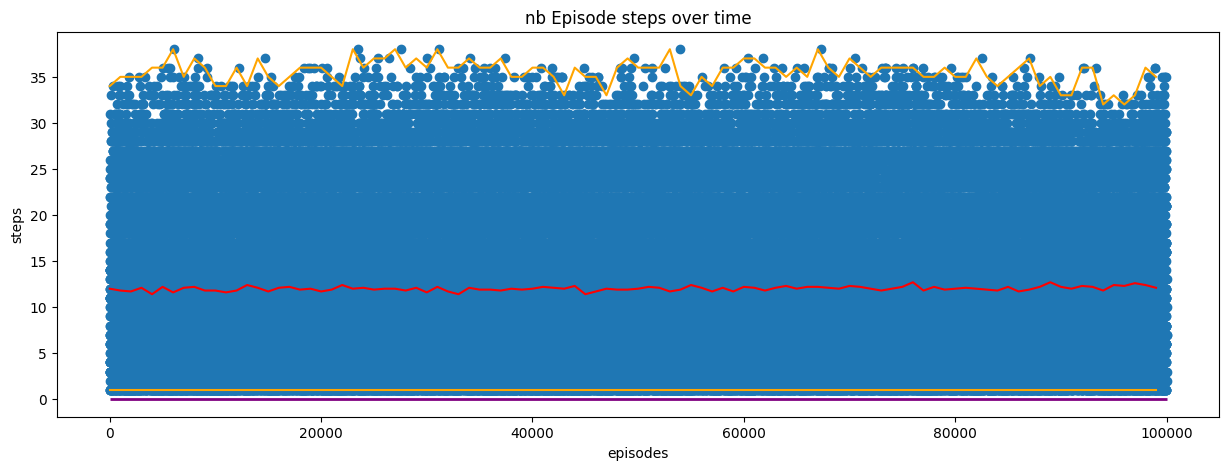

Maximum: 38
Average: 12.01113

Values: 12.0 > 11.8 > 11.7 > 12.1 > 11.4 > 12.2 > 11.6 > 12.1 > 12.2 > 11.8 > 11.8 > 11.6 > 11.8 > 12.4 > 12.1 > 11.7 > 12.1 > 12.2 > 11.9 > 12.0 > 11.7 > 11.9 > 12.4 > 12.0 > 12.1 > 11.9 > 12.0 > 12.0 > 11.8 > 12.1 > 11.6 > 12.2 > 11.7 > 11.4 > 12.1 > 11.9 > 11.9 > 11.8 > 12.0 > 11.9 > 12.0 > 12.2 > 12.1 > 12.0 > 12.3 > 11.4 > 11.7 > 12.0 > 11.9 > 11.9 > 12.0 > 12.2 > 12.1 > 11.7 > 11.9 > 12.4 > 12.1 > 11.7 > 12.1 > 11.7 > 12.2 > 12.1 > 11.8 > 12.1 > 12.3 > 12.0 > 12.2 > 12.2 > 12.1 > 12.0 > 12.3 > 12.2 > 12.0 > 11.8 > 12.0 > 12.2 > 12.7 > 11.8 > 12.2 > 11.9 > 12.0 > 12.1 > 12.0 > 11.9 > 11.8 > 12.2 > 11.7 > 11.9 > 12.2 > 12.7 > 12.2 > 12.0 > 12.3 > 12.2 > 11.8 > 12.4 > 12.3 > 12.6 > 12.4 > 12.1

Minimum (last 1000): 1
Average (last 1000): 12.01009090909091
Maximum (last 1000): 38


In [117]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

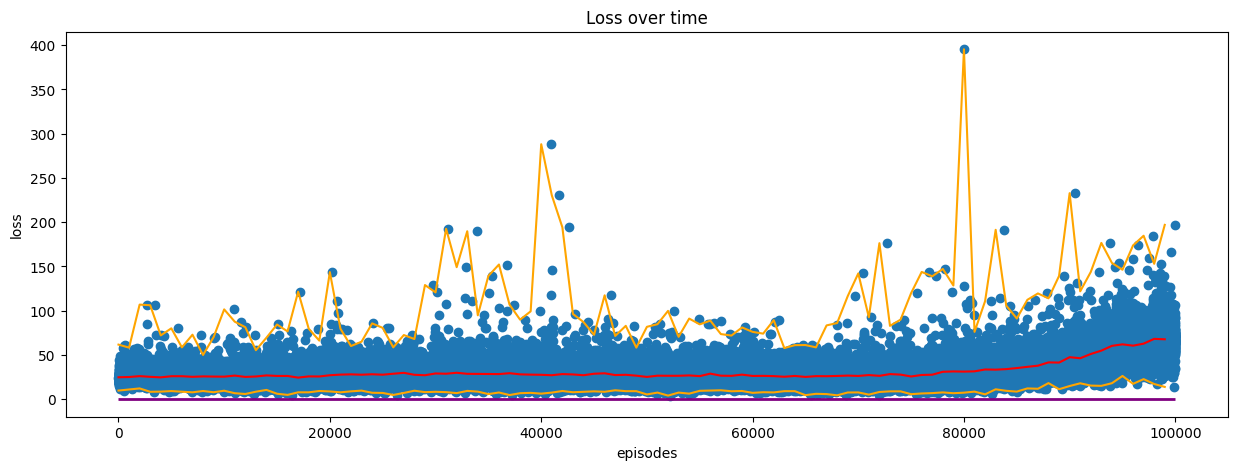

Maximum: 395.4468994140625
Average: 31.03792143050194

Values: 24.8 > 25.1 > 26.1 > 25.3 > 24.7 > 26.0 > 26.0 > 25.3 > 25.8 > 25.6 > 25.5 > 26.7 > 25.2 > 25.7 > 26.9 > 26.3 > 26.3 > 24.4 > 25.8 > 25.7 > 27.1 > 27.8 > 28.1 > 27.7 > 28.2 > 27.7 > 28.8 > 29.8 > 27.6 > 27.1 > 29.1 > 28.8 > 29.9 > 28.7 > 28.6 > 28.5 > 28.4 > 29.4 > 28.1 > 27.8 > 27.6 > 27.1 > 28.4 > 28.0 > 27.1 > 28.8 > 29.3 > 27.3 > 27.6 > 26.6 > 25.2 > 26.6 > 26.5 > 26.5 > 26.9 > 26.1 > 28.9 > 26.6 > 26.4 > 27.8 > 26.3 > 26.4 > 26.1 > 25.4 > 26.3 > 25.2 > 26.1 > 26.0 > 26.3 > 26.7 > 26.3 > 27.3 > 26.4 > 28.4 > 27.8 > 25.7 > 27.4 > 27.7 > 31.0 > 31.4 > 31.2 > 31.5 > 33.6 > 33.4 > 34.0 > 35.2 > 36.6 > 37.9 > 41.6 > 41.4 > 47.5 > 46.3 > 51.1 > 54.9 > 60.3 > 62.0 > 60.5 > 62.8 > 68.2 > 67.7

Minimum (last 1000): 4.108587265014648
Average (last 1000): 30.6674142567702
Maximum (last 1000): 395.4468994140625


In [118]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

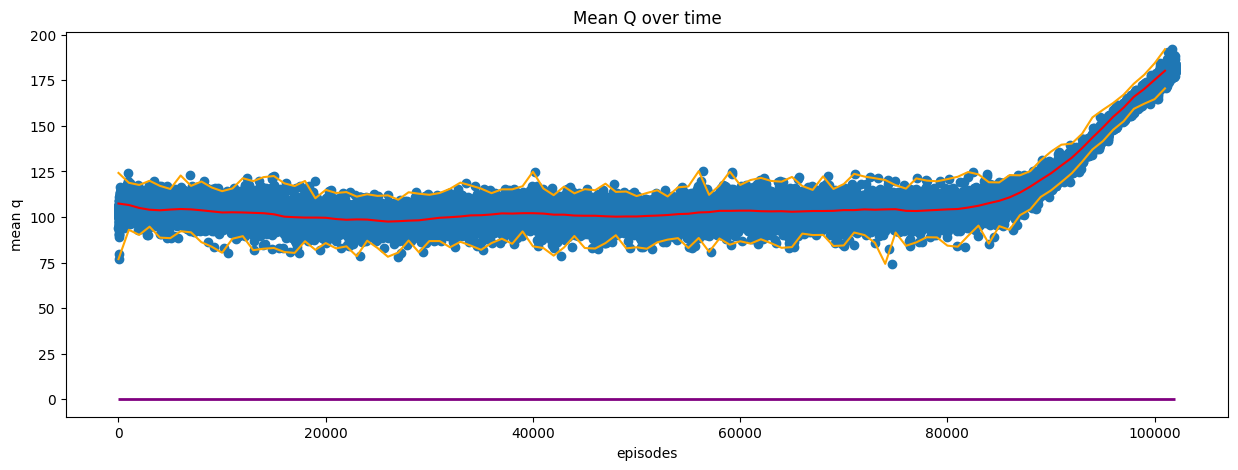

Maximum: 192.10226440429688
Average: 108.52118224788832

Values: 107.4 > 106.6 > 105.0 > 104.0 > 103.7 > 104.1 > 104.4 > 104.2 > 103.7 > 103.1 > 102.5 > 102.6 > 102.5 > 102.3 > 102.1 > 101.5 > 100.2 > 99.9 > 99.7 > 99.7 > 99.6 > 98.9 > 98.5 > 98.7 > 98.6 > 98.0 > 97.5 > 97.7 > 98.0 > 98.2 > 98.9 > 99.6 > 99.9 > 100.3 > 100.9 > 101.0 > 101.4 > 102.0 > 101.9 > 102.1 > 102.1 > 101.9 > 101.3 > 101.3 > 100.8 > 100.7 > 100.7 > 100.4 > 100.2 > 100.3 > 100.3 > 100.6 > 100.8 > 101.1 > 101.6 > 101.8 > 102.5 > 102.7 > 103.4 > 103.4 > 103.5 > 103.5 > 103.2 > 103.1 > 103.2 > 102.9 > 103.1 > 103.3 > 103.3 > 103.4 > 103.8 > 103.8 > 104.2 > 104.0 > 104.2 > 104.3 > 103.4 > 103.3 > 103.6 > 103.9 > 104.2 > 104.4 > 105.2 > 106.2 > 107.6 > 108.9 > 110.8 > 113.4 > 116.7 > 120.4 > 124.0 > 128.3 > 132.5 > 137.8 > 143.6 > 149.1 > 155.0 > 160.0 > 166.0 > 170.3 > 175.3 > 180.3

Minimum (last 1000): 74.30874633789062
Average (last 1000): 107.81067731877002
Maximum (last 1000): 184.41094970703125


In [119]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

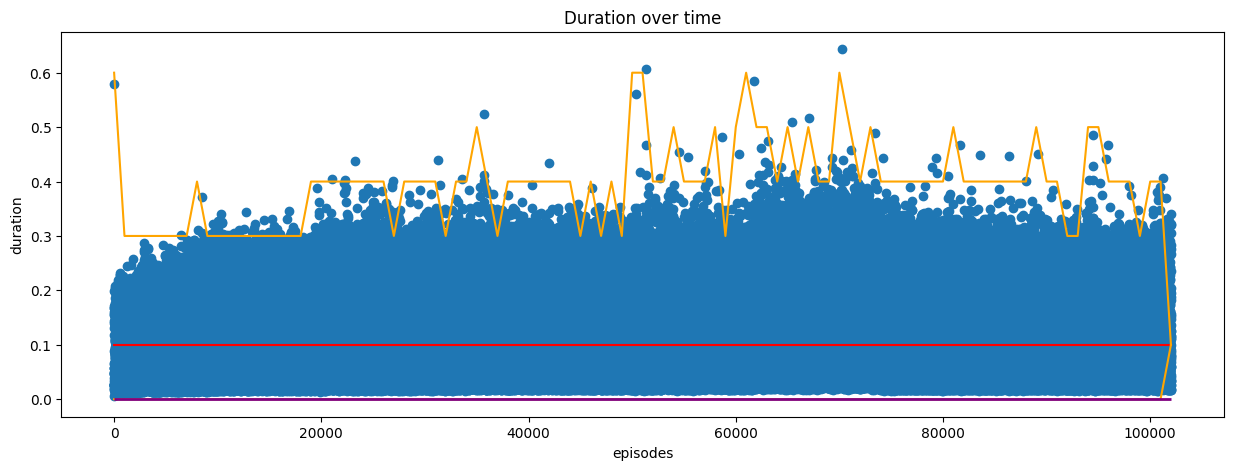

Maximum: 0.6431284999998752
Average: 0.12119796078371807

Values: 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1

Minimum (last 1000): 0.006461599999999734
Average (last 1000): 0.1211931350986629
Maximum (last 1000): 0.6431284999998752


In [120]:
plot(duration, "Duration over time", "episodes", "duration")